In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Read the data
data = pd.read_csv(r"E:\Projects\Understanding Buying Behavior using hierarchical clustering\wholesale_customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

X = data.drop(["Grocery"], axis = 1)

In [4]:
# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

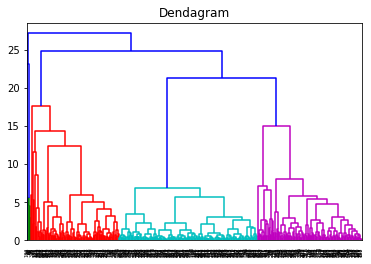

In [5]:
#create dendragram
dendagram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendagram")
plt.show()

In [6]:
# Creating model
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_out = model.fit_predict(X)

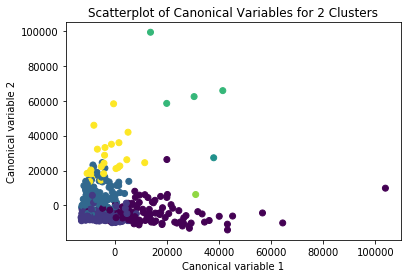

In [7]:
pca_2 = PCA(2) # Two Canonical Variables
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()